## Importing Libs

In [12]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

## defining genres

In [32]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

<Figure size 720x720 with 0 Axes>

## creating spectogram

In [6]:
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [10]:
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
header

['filename',
 'chroma_stft',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

## creating csv file

In [12]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

## loading and preprocessing

In [3]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806383,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [4]:
data.shape
data.drop(['filename'],axis=1,inplace=True)

In [5]:
data=data.sample(frac=1)

In [6]:
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
688,0.421571,1988.120374,1986.988534,4148.191583,0.092420,-129.700195,104.034393,-26.972441,68.271103,2.435361,...,5.377908,-3.004201,2.977995,-5.836917,3.937056,-6.004716,-1.969018,2.388182,-3.851087,metal
735,0.412095,3194.109244,3052.840219,6993.491045,0.159380,24.490849,68.962845,-4.211277,-1.029357,5.253344,...,-0.008605,2.069138,1.552778,4.000855,2.817995,2.201693,1.577579,-0.471415,0.527109,pop
998,0.362349,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,56.595062,10.443338,...,7.683082,-10.071786,-0.255098,-5.276486,-2.816288,-4.416438,1.558265,-5.043121,-3.585596,rock
105,0.268582,1431.427561,1558.388149,2836.657847,0.075239,-264.247345,138.148911,-30.094566,37.815598,-7.173775,...,2.667867,-4.791535,-1.404992,-2.094342,2.984209,3.361477,4.814611,1.761761,-1.826767,classical
825,0.362465,1709.084136,1899.295438,3583.136667,0.073750,-177.330978,110.984230,-15.662017,36.783543,0.069497,...,8.589011,-5.949765,2.897852,-5.276860,-3.058388,-6.198998,2.056391,-0.986980,2.303922,reggae


In [7]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

## spliting data and building the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
x_val = X_train[:200]
x_train = X_train[200:]
y_val = y_train[:200]
y_train = y_train[200:]

In [24]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist=model.fit(x_train,
          y_train,
          epochs=150,
          batch_size=512,
          validation_data=(x_val, y_val))


Epoch 1/150
2/2 [==============================] - 0s 76ms/step - loss: 2.3183 - accuracy: 0.1200 - val_loss: 2.1921 - val_accuracy: 0.2250
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 2.1804 - accuracy: 0.2385 - val_loss: 2.0767 - val_accuracy: 0.2750
Epoch 3/150
2/2 [==============================] - 0s 18ms/step - loss: 2.0684 - accuracy: 0.2877 - val_loss: 1.9714 - val_accuracy: 0.2950
Epoch 4/150
2/2 [==============================] - 0s 16ms/step - loss: 1.9804 - accuracy: 0.3169 - val_loss: 1.8912 - val_accuracy: 0.3100
Epoch 5/150
2/2 [==============================] - 0s 11ms/step - loss: 1.9096 - accuracy: 0.3246 - val_loss: 1.8170 - val_accuracy: 0.3150
Epoch 6/150
2/2 [==============================] - 0s 11ms/step - loss: 1.8308 - accuracy: 0.3538 - val_loss: 1.7417 - val_accuracy: 0.3350
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 1.7790 - accuracy: 0.3646 - val_loss: 1.6698 - val_accuracy: 0.3650
Epoch 8/150
2/2 [===

2/2 [==============================] - 0s 11ms/step - loss: 0.5457 - accuracy: 0.8092 - val_loss: 1.0753 - val_accuracy: 0.6450
Epoch 60/150
2/2 [==============================] - 0s 11ms/step - loss: 0.5124 - accuracy: 0.8123 - val_loss: 1.0597 - val_accuracy: 0.6450
Epoch 61/150
2/2 [==============================] - 0s 10ms/step - loss: 0.5377 - accuracy: 0.8123 - val_loss: 1.0697 - val_accuracy: 0.6650
Epoch 62/150
2/2 [==============================] - 0s 14ms/step - loss: 0.5095 - accuracy: 0.8292 - val_loss: 1.0798 - val_accuracy: 0.6400
Epoch 63/150
2/2 [==============================] - 0s 11ms/step - loss: 0.4892 - accuracy: 0.8354 - val_loss: 1.0792 - val_accuracy: 0.6500
Epoch 64/150
2/2 [==============================] - 0s 12ms/step - loss: 0.4669 - accuracy: 0.8385 - val_loss: 1.0769 - val_accuracy: 0.6600
Epoch 65/150
2/2 [==============================] - 0s 11ms/step - loss: 0.4661 - accuracy: 0.8323 - val_loss: 1.0803 - val_accuracy: 0.6500
Epoch 66/150
2/2 [========

2/2 [==============================] - 0s 14ms/step - loss: 0.1690 - accuracy: 0.9508 - val_loss: 1.3228 - val_accuracy: 0.6750
Epoch 118/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1626 - accuracy: 0.9508 - val_loss: 1.3429 - val_accuracy: 0.6700
Epoch 119/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1961 - accuracy: 0.9323 - val_loss: 1.3272 - val_accuracy: 0.6700
Epoch 120/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1800 - accuracy: 0.9385 - val_loss: 1.2991 - val_accuracy: 0.6750
Epoch 121/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1597 - accuracy: 0.9585 - val_loss: 1.3158 - val_accuracy: 0.6600
Epoch 122/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1800 - accuracy: 0.9492 - val_loss: 1.3369 - val_accuracy: 0.6700
Epoch 123/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1438 - accuracy: 0.9538 - val_loss: 1.3588 - val_accuracy: 0.6700
Epoch 124/150
2/2 [=

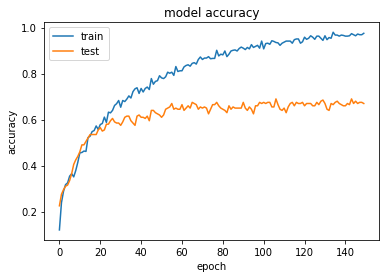

In [25]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

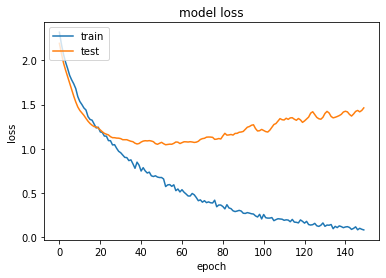

In [26]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## evaluating the model

In [27]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

5/5 [==============================] - 0s 1ms/step - loss: 1.6352 - accuracy: 0.6867
test_acc:  0.6866666674613953
